# 📊 Predicting Employee Exit

This notebook guides you through building a machine learning model to predict employee attrition (exit). The dataset contains both numerical and categorical features, and the target variable is `left`.


## 🔍 Step 1: Load & Explore the Dataset

In [23]:
import pandas as pd

# Load the data (replace with actual path if needed)
df = pd.read_csv('/content/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [24]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [25]:
# Check class distribution
df['left'].value_counts(normalize=True)

,proportion
left,
0,0.761917
1,0.238083


In [26]:
df['sales'].value_counts()

,count
sales,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [27]:
# code for encoding the columns salary and department
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
df['salary'] = le1.fit_transform(df['salary'])
le2 = LabelEncoder()
df['sales'] = le2.fit_transform(df['sales'])

In [28]:
print(le2.classes_)

['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


In [29]:
print(le1.classes_)

['high' 'low' 'medium']


In [30]:
# snippet to make a list of encoded numbers and salary
list_salary = list(enumerate(le1.classes_))
list_dept = list(enumerate(le2.classes_))

In [31]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


## 🧹 Step 2: Data Preprocessing

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
# Scale numeric variables
scaler = StandardScaler()
X = df.drop('left', axis=1)
X_scaled = scaler.fit_transform(X)

y = df['left']

## ✂️ Step 3: Split the Data

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## 🤖 Step 4: Train a Classification Model

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 📈 Step 5: Evaluate the Model

In [37]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

[[2285    9]
 [  26  680]]


## 🌟 Step 6: Feature Importance (Optional)

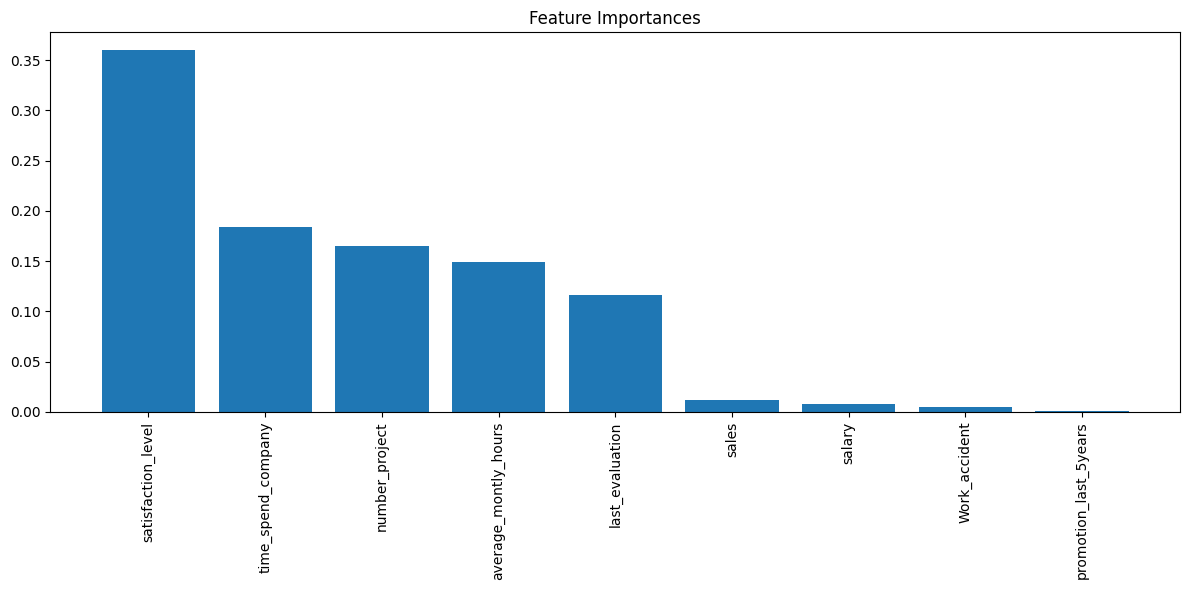

In [38]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()